In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import yticks
%matplotlib inline  

import seaborn as sns
pal = sns.color_palette()
sns.set_context('notebook')
sns.set_style('darkgrid')

np.random.seed(42)
pd.set_option('display.max_columns', 500)

In [2]:
train_df = pd.read_csv("data/train.csv")
train_df.shape

(4209, 378)

In [3]:
test_df = pd.read_csv("data/test.csv")
test_df.shape

(4209, 377)

Check instersection of train and test columns

In [4]:
set(train_df.columns) - set(test_df.columns)

{'y'}

Check type correspondence

In [5]:
d_train = train_df.dtypes.to_dict()
d_train.pop('y')
d_test = test_df.dtypes.to_dict()
matching_dtypes = {key: (d_train[key], d_test[key]) for key in d_train.keys() 
                   if (d_train[key] != d_test[key])}
matching_dtypes

{}

In [6]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

Split categorical and numurical features

In [7]:
num_cols = train_df._get_numeric_data().columns
categorical_cols = list(set(test_df.columns) - set(num_cols))
num_cols = num_cols.drop('y')
num_cols = num_cols.drop('ID')

In [8]:
categorical_cols

['X6', 'X0', 'X2', 'X4', 'X1', 'X8', 'X3', 'X5']

In [9]:
num_cols

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [10]:
train_df[num_cols].describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,42

In [11]:
test_df[num_cols].describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0000

In [12]:
train_df[categorical_cols].describe()

,X6,X0,X2,X4,X1,X8,X3,X5
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,12,47,44,4,27,25,7,29
top,g,z,as,d,aa,j,c,w
freq,1042,360,1659,4205,833,277,1942,231


In [13]:
test_df[categorical_cols].describe()

,X6,X0,X2,X4,X1,X8,X3,X5
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,12,49,45,4,27,25,7,32
top,g,ak,as,d,aa,e,c,v
freq,1073,432,1658,4203,826,274,1900,246


No NaN features!

In [14]:
print(max(train_df.isnull().sum()))
print(max(test_df.isnull().sum()))

0
0


In [15]:
cols = [c for c in train_df.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
train_df[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [16]:
train_counts = [[], [], []]
for c in cols:
    typ = train_df[c].dtype
    uniq = train_df[c].unique().size
    if uniq == 1: train_counts[0].append(c)
    elif uniq == 2 and typ == np.int64: train_counts[1].append(c)
    else: train_counts[2].append(c)

print('Train')
print('Constant features: {} \nBinary features: {} \nCategorical features: {}\n'.format(*[len(c) for c in train_counts]))
print('Train Constant features:', train_counts[0])
print('Train Categorical features:', train_counts[2])



print('\nTest')
test_counts = [[], [], []]
for c in cols:
    typ = test_df[c].dtype
    uniq = test_df[c].unique().size
    if uniq == 1: test_counts[0].append(c)
    elif uniq == 2 and typ == np.int64: test_counts[1].append(c)
    else: test_counts[2].append(c)

print('Test Constant features: {} \nBinary features: {} \nCategorical features: {}\n'.format(*[len(c) for c in test_counts]))
print('Test Constant features:', test_counts[0])
print('Test Categorical features:', test_counts[2])

Train
Constant features: 12 
Binary features: 356 
Categorical features: 8

Train Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Train Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

Test
Test Constant features: 5 
Binary features: 363 
Categorical features: 8

Test Constant features: ['X257', 'X258', 'X295', 'X296', 'X369']
Test Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


There are some different constant features in train and test. I tend to drop constant feature.

In [17]:
train_df.drop(train_counts[0], axis=1, inplace=True)
test_df.drop(train_counts[0], axis=1, inplace=True)

All these features are zeroes in test, but not constants in train

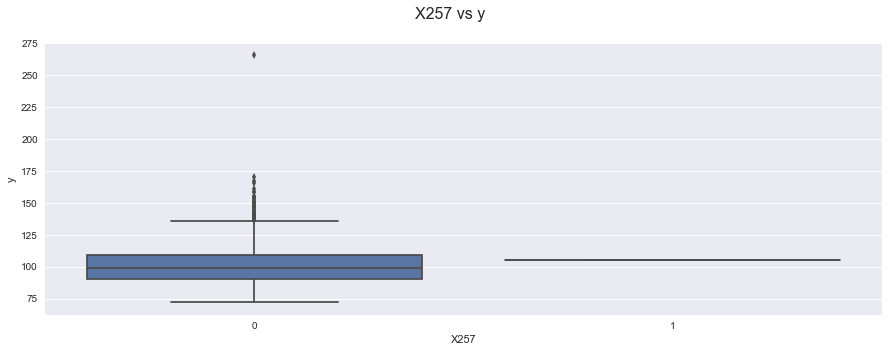

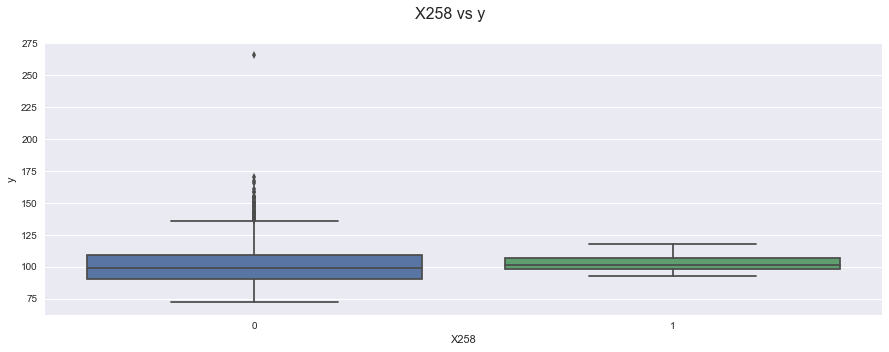

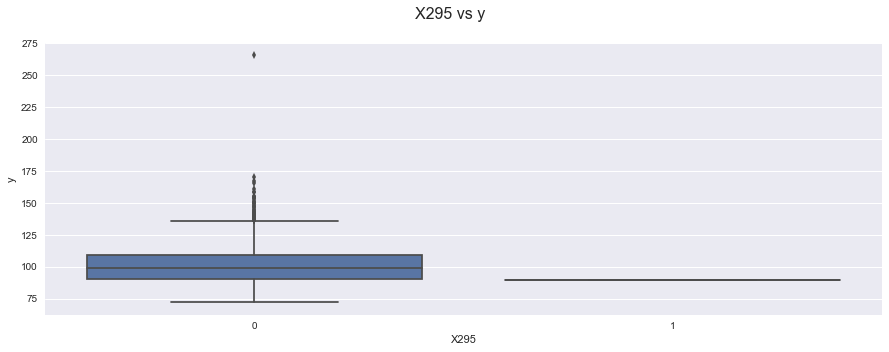

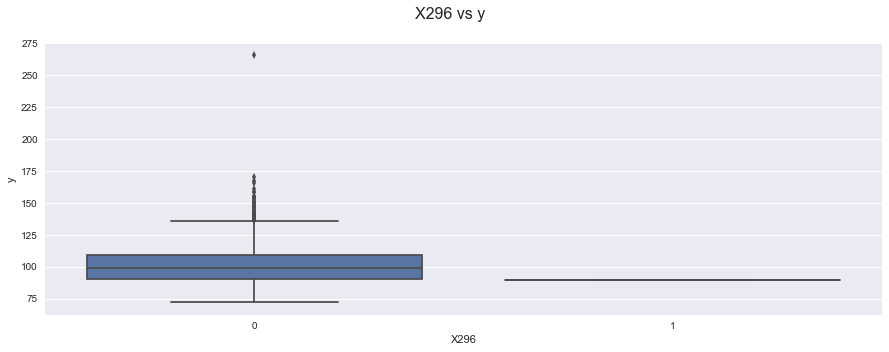

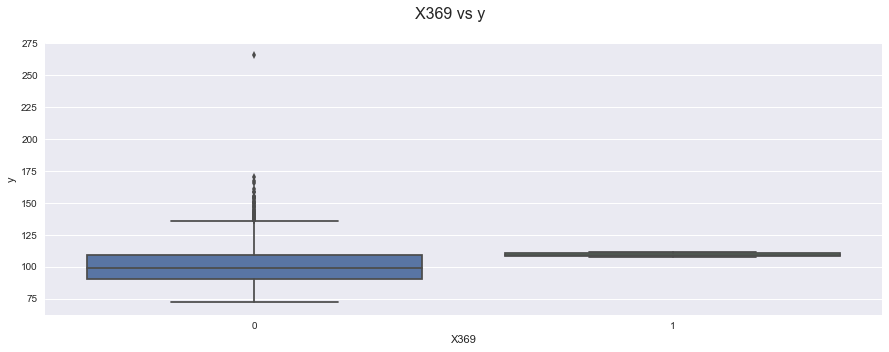

In [18]:
for c in test_counts[0]:    
    data = pd.concat([train_df.y, train_df[c]], axis=1)
    f, ax = plt.subplots(figsize=(15, 5))
    f.suptitle('{} vs y'.format(c), size=16)
    fig = sns.boxplot(x=c, y="y", data=data)

There are some values of categorical features that contain in train but lack in test. 

In [19]:
d_train = dict()
for c in train_counts[2]:
    diff = list(set(train_df[c].unique()) - set(test_df[c].unique()))    
    if len(diff) > 0:
        d_train[c] = diff
print(d_train)
        
d_test = dict()
for c in test_counts[2]:
    diff = list(set(test_df[c].unique()) - set(train_df[c].unique()))    
    if len(diff) > 0:
        d_test[c] = diff
print(d_test)

{'X0': ['ab', 'q', 'aa', 'ac'], 'X2': ['c', 'o', 'l', 'ar', 'aa'], 'X5': ['u']}
{'X0': ['p', 'av', 'an', 'ae', 'ag', 'bb'], 'X2': ['ab', 'ax', 'ad', 'w', 'aj', 'u'], 'X5': ['a', 'z', 'b', 't']}


I also tend to drop them. 

In [20]:
for name, values in d_train.items():
    for value in values:  # rewrite all/any
        train_df = train_df[~(train_df[name] == value)]

Look at cardinality categorical features

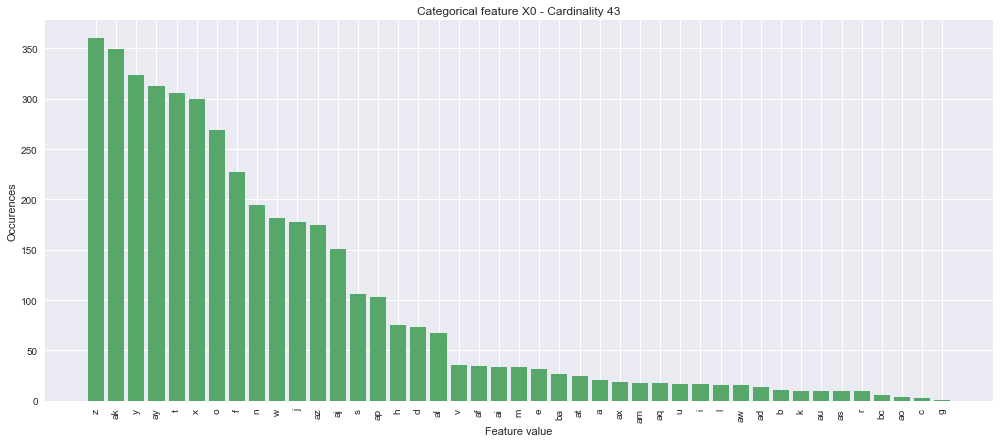

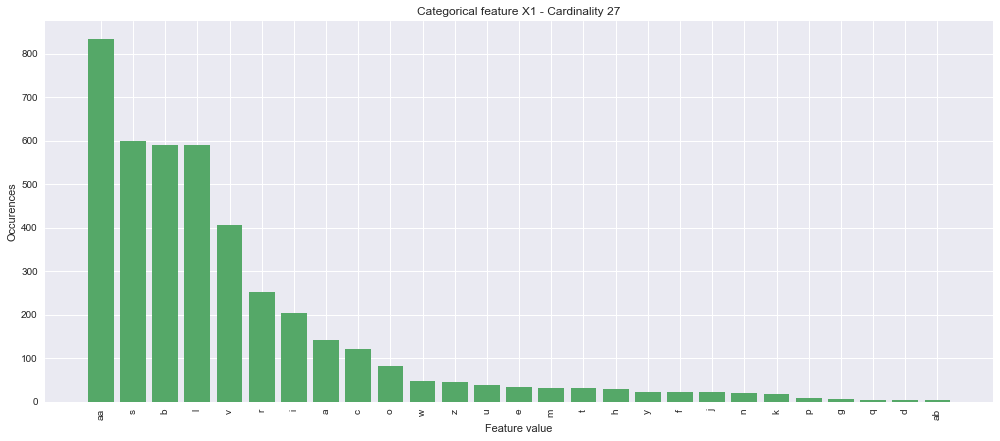

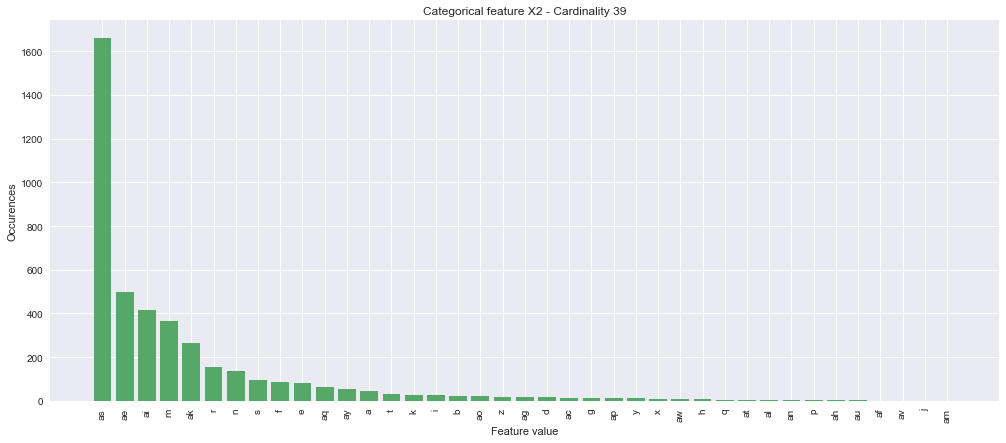

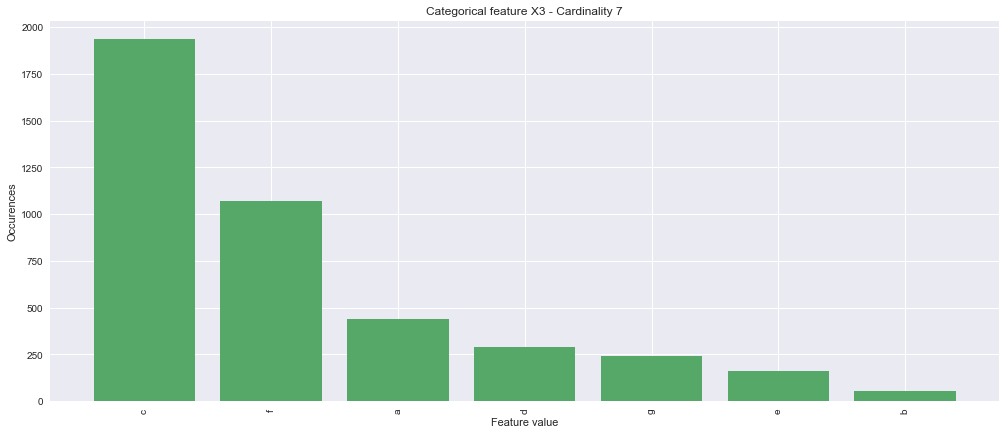

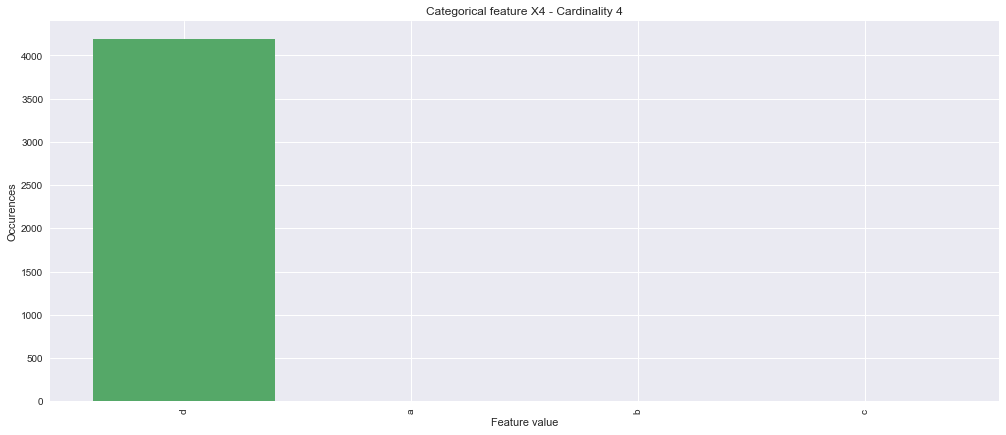

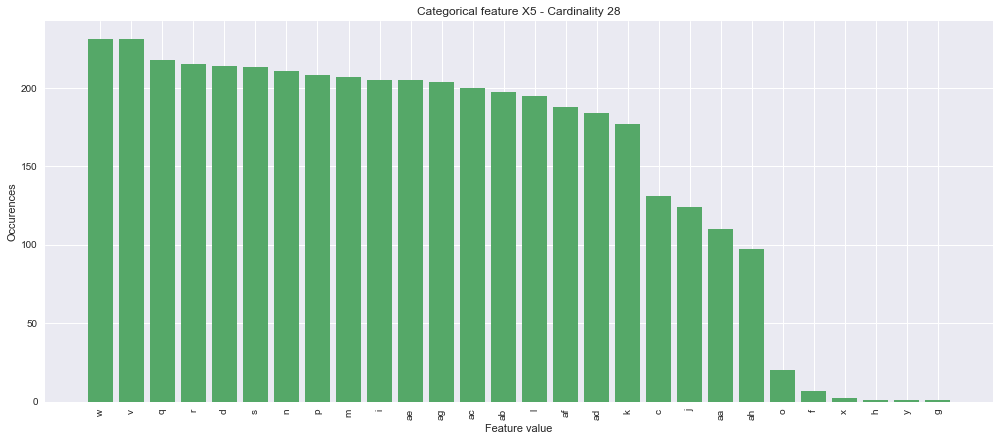

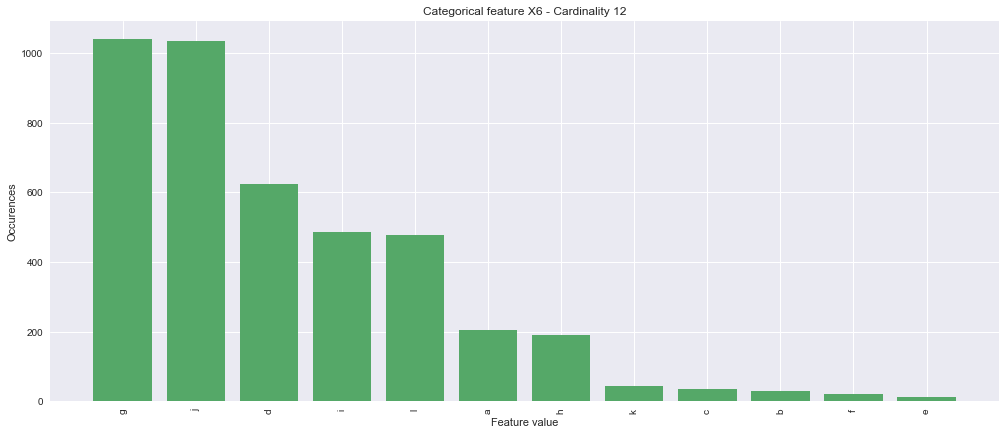

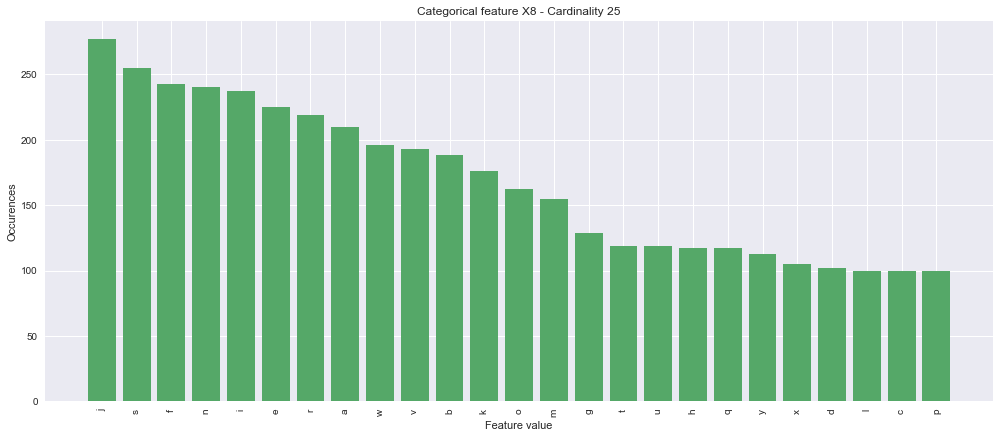

In [21]:
for c in train_counts[2]:
    value_counts = train_df[c].value_counts()
    fig, ax = plt.subplots(figsize=(17, 7))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(train_df[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

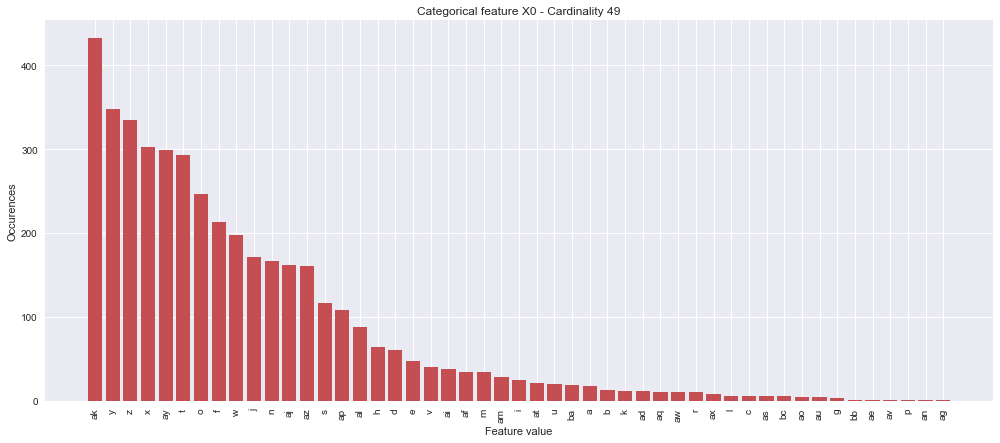

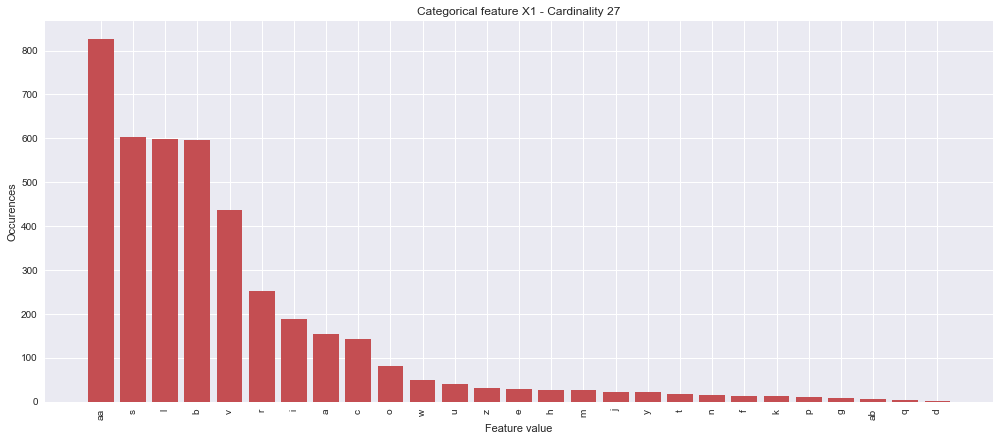

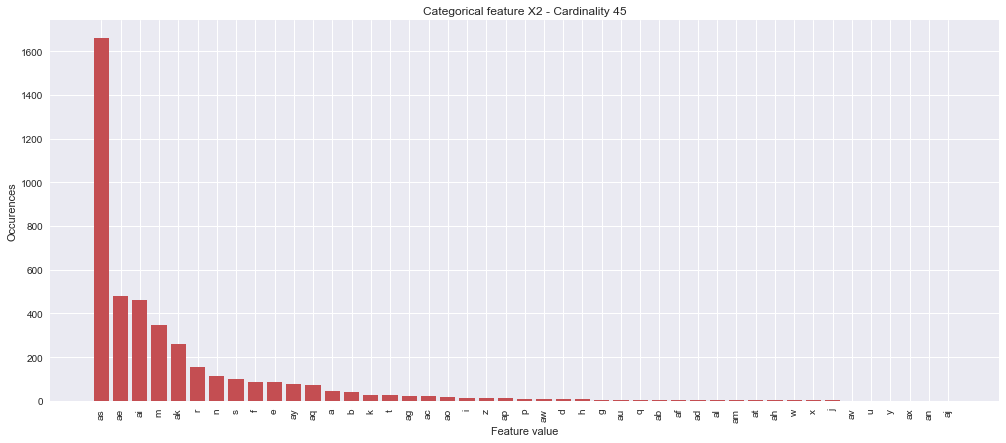

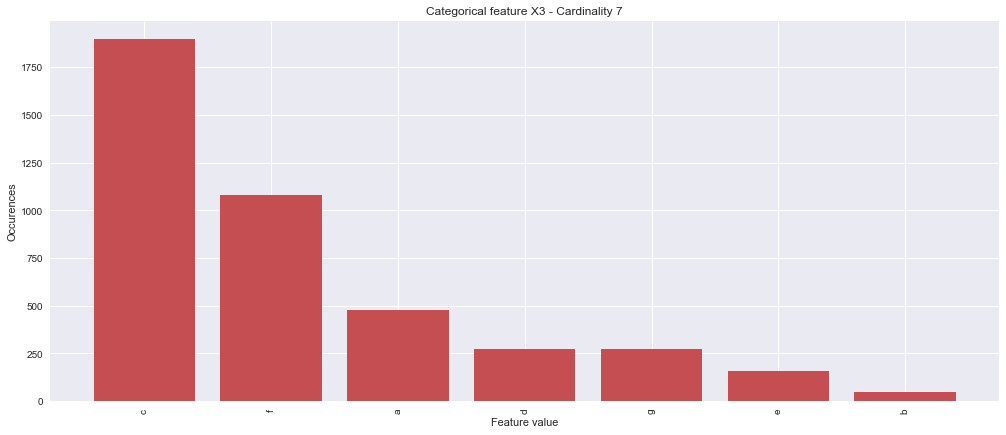

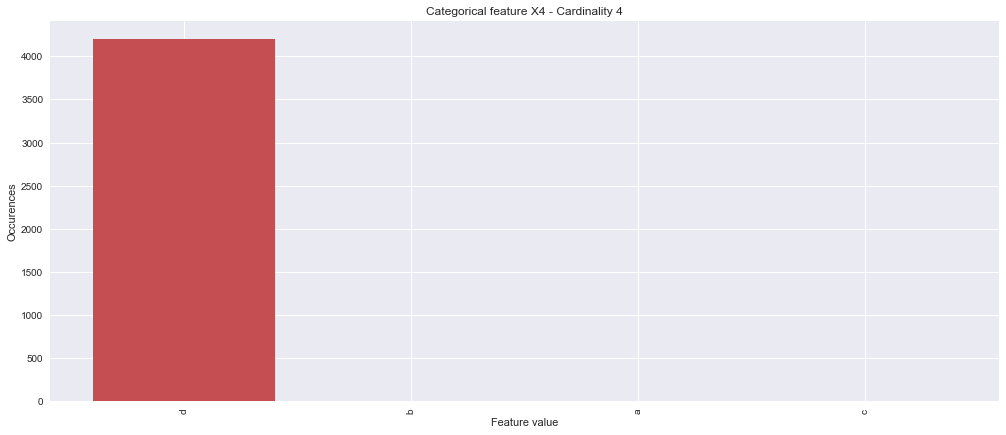

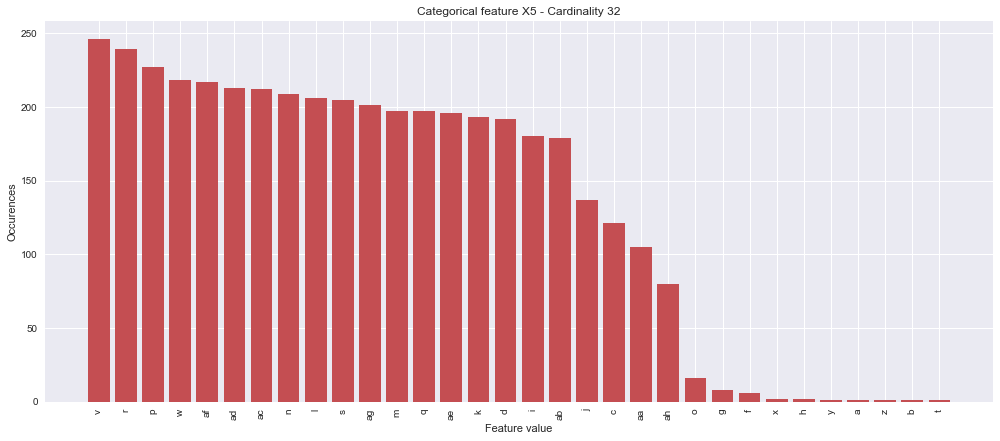

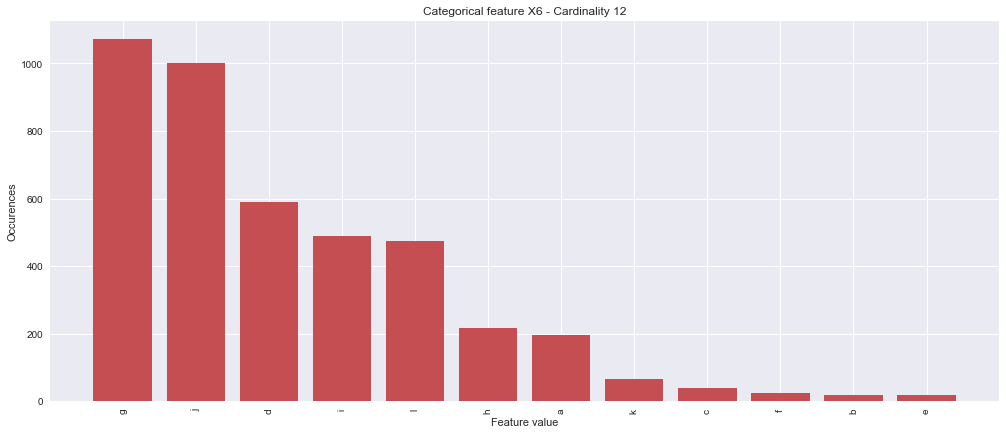

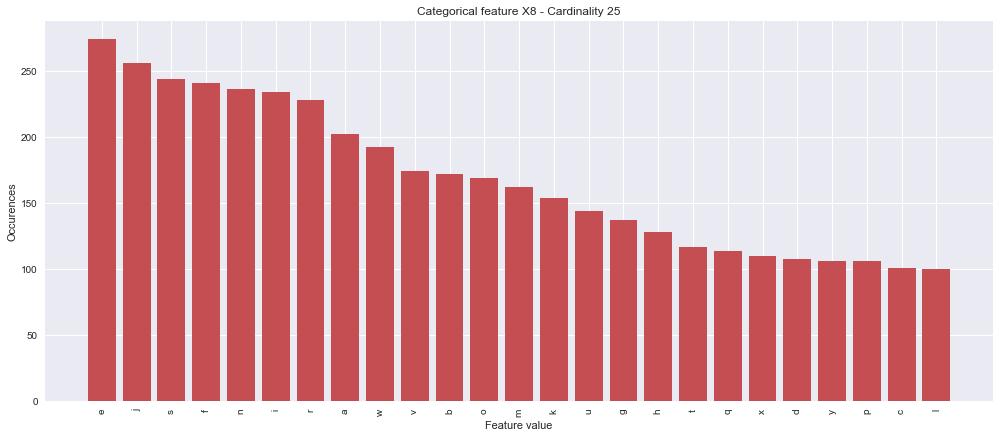

In [22]:
for c in test_counts[2]:
    value_counts = test_df[c].value_counts()
    fig, ax = plt.subplots(figsize=(17, 7))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(test_df[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[2])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

I want to use rare values (combination) to try separate train, but before will be good to make baseline with xgb. 

In [23]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

C:\Users\DolmatovKI\Desktop\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\simplejson\encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2017-07-07 20:44:20.486573. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [27]:
usable_columns = list(set(train_df.columns) - set(['ID', 'y']))

In [ ]:
y_train = train_df['y'].values
id_test = test_df['ID'].values

x_train = train_df[usable_columns]
x_test = test_df[usable_columns]

mapper = lambda x: sum([ord(letter) for letter in x])
for col in categorical_cols:   
    x_train[col] = x_train[col].apply(mapper)
    x_test[col] = x_test[col].apply(mapper)
    
x_train_split, x_valid, y_train_split, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)


d_train = xgb.DMatrix(x_train_split, label=y_train_split)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)
y_mean = train_df.y.mean()

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

In [ ]:
p_test = clf.predict(d_test)
sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.to_csv('baseline.csv', index=False)

**LB = 0.55016**

---

I have two ideas: 

* Looking for the duplicate rows in train-test

* Looking for similar rows in train ~ system of linear equations

In [28]:
train_duplicates = train_df[train_df.drop(['y', 'ID'], axis=1).duplicated(keep=False)].sort_values(by=usable_columns)
train_duplicates.shape

(515, 366)

In [29]:
test_duplicates = test_df[test_df.drop('ID', axis=1).duplicated(keep=False)].sort_values(by=usable_columns)
test_duplicates.shape

(516, 365)

In [30]:
train_test_intersection = pd.merge(train_df.drop(['y', 'ID'], axis=1), test_df, how='inner')
train_test_intersection.shape

(887, 365)

It's very insteresting! To my mind, will be better remove duplicates from train, because they will confuse algorithm. On the other hand you can merge them and take mean target value. After that, evaluate train-test intersection and fill test according to train. 

In [31]:
train_df.drop(train_duplicates.index, inplace=True) 

In [32]:
train_test_intersection = pd.merge(train_df.drop(['y', 'ID'], axis=1), test_df, how='inner')
train_test_intersection.shape

(319, 365)

Consequently, we are able to fill 319 values in test based on train.

In [33]:
x_train = train_df[usable_columns]
y_train = train_df['y'].values

id_test = test_df['ID'].values
x_test = test_df[usable_columns]

mapper = lambda x: sum([ord(letter) for letter in x])
for col in categorical_cols:   
    x_train[col] = x_train[col].apply(mapper)
    x_test[col] = x_test[col].apply(mapper)
    
x_train_split, x_valid, y_train_split, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)


d_train = xgb.DMatrix(x_train_split, label=y_train_split)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)
y_mean = train_df.y.mean()

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:98.6943	valid-rmse:98.8266	train-r2:-61.6489	valid-r2:-56.1512
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.8057	valid-rmse:80.9628	train-r2:-40.9966	valid-r2:-37.3574
[20]	train-rmse:66.2147	valid-rmse:66.3966	train-r2:-27.1993	valid-r2:-24.797
[30]	train-rmse:54.3254	valid-rmse:54.5328	train-r2:-17.9817	valid-r2:-16.4018
[40]	train-rmse:44.6521	valid-rmse:44.8865	train-r2:-11.8237	valid-r2:-10.7899
[50]	train-rmse:36.7982	valid-rmse:37.0711	train-r2:-7.70929	valid-r2:-7.04174
[60]	train-rmse:30.4411	valid-rmse:30.7552	train-r2:-4.96004	valid-r2:-4.53498
[70]	train-rmse:25.3186	valid-rmse:25.6766	train-r2:-3.12296	valid-r2:-2.85791
[80]	train-rmse:21.2166	valid-rmse:21.6157	train-r2:-1.89522	valid-r2:-1.7341
[90]	train-rmse:17.9592	valid-rmse:18.4065	train-r2:-1.07445	valid-r2:-0.982538
[100]	train-rmse:15.3991	valid-rmse:15.8975	train-r2:-0.52518	valid-r2:

In [34]:
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.to_csv('sub_without_x_duplicate.csv', index=False)

**LB = 0.55324**

Firstly, add fill test from train. Secondly, use mean for each duplicate in train. Thirdly, fill test with new train (mean duplicate).

In [43]:
filled_test = pd.merge(test_df, train_df.drop('ID', axis=1), how='left')
filled_test = filled_test[['ID', 'y']]
filled_test.dropna(inplace=True)

In [60]:
for ID in filled_test.ID:
    sub[sub.ID==ID] = filled_test[filled_test.ID==ID] 

In [62]:
sub.to_csv('sub_without_x_duplicate_fill_test.csv', index=False)

**LB = 0.54612**

It's very strange... Looks like ID is feature also.